CSCE 636 Homework 2-2 Multiclass classification

In [1]:
# import reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# preparing the data
# one-hot encode, vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
  

In [0]:
# vectorize the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
# model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# create a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 195us/step - loss: 2.5317 - acc: 0.4957 - val_loss: 1.7209 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.4458 - acc: 0.6880 - val_loss: 1.3463 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0960 - acc: 0.7653 - val_loss: 1.1717 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.8703 - acc: 0.8160 - val_loss: 1.0794 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.7037 - acc: 0.8472 - val_loss: 0.9848 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5669 - acc: 0.8791 - val_loss: 0.9421 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.4583 - acc: 0.9043 - val_loss: 0.9090 - val_acc: 0.8010


In [11]:
# a dictionary containing data about everything that happened during training
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(loss) + 1)

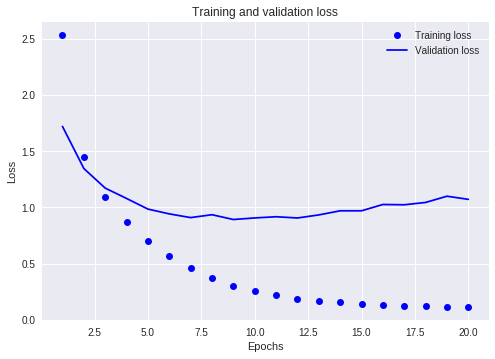

In [13]:
# plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

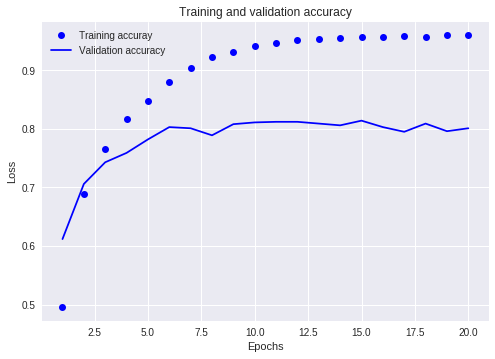

In [14]:
# plot the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuray')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
# reduce the epochs to 9 (overfit after nine) and retrain the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, 
          one_hot_train_labels,
          epochs=9,
          batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 194us/step - loss: 2.4435 - acc: 0.5331
Epoch 2/9
8982/8982 [==============================] - 1s 151us/step - loss: 1.3236 - acc: 0.7165
Epoch 3/9
8982/8982 [==============================] - 1s 141us/step - loss: 0.9739 - acc: 0.7876
Epoch 4/9
8982/8982 [==============================] - 1s 140us/step - loss: 0.7562 - acc: 0.8393
Epoch 5/9
8982/8982 [==============================] - 1s 140us/step - loss: 0.5961 - acc: 0.8768
Epoch 6/9
8982/8982 [==============================] - 1s 143us/step - loss: 0.4746 - acc: 0.9006
Epoch 7/9
8982/8982 [==============================] - 1s 142us/step - loss: 0.3828 - acc: 0.9173
Epoch 8/9
8982/8982 [==============================] - 1s 142us/step - loss: 0.3072 - acc: 0.9350
Epoch 9/9
8982/8982 [==============================] - 1s 141us/step - loss: 0.2587 - acc: 0.9414


In [16]:
# training and test performance
(train_loss, train_acc) = model.evaluate(x_train, one_hot_train_labels)
(test_loss, test_acc) = model.evaluate(x_test, one_hot_test_labels)

print("train loss: ", train_loss)
print("train accuracy: ", train_acc)

print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

2246/2246 [==============================] - 0s 121us/step
train loss:  0.20651774142751236
train accuracy:  0.9521264751327513
test loss:  0.9794521444308789
test accuracy:  0.7916295637218207
